<a href="https://colab.research.google.com/github/wmsgur8679/BigData/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B4%88%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설


Mounted at /content/drive


교통사고 통계

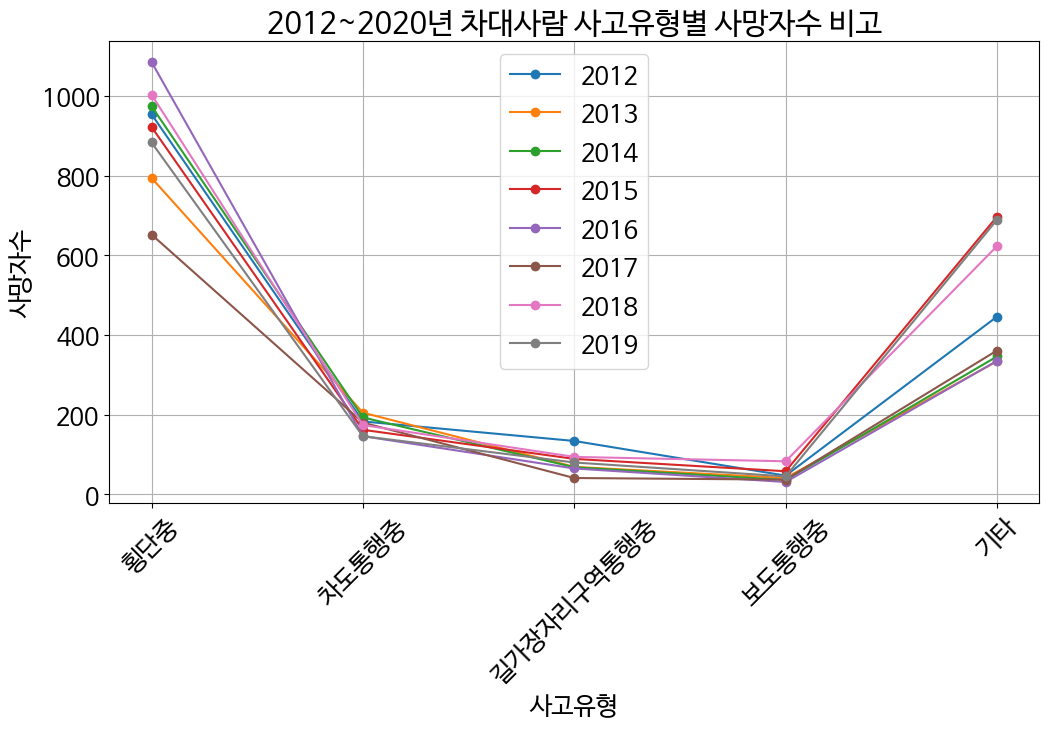

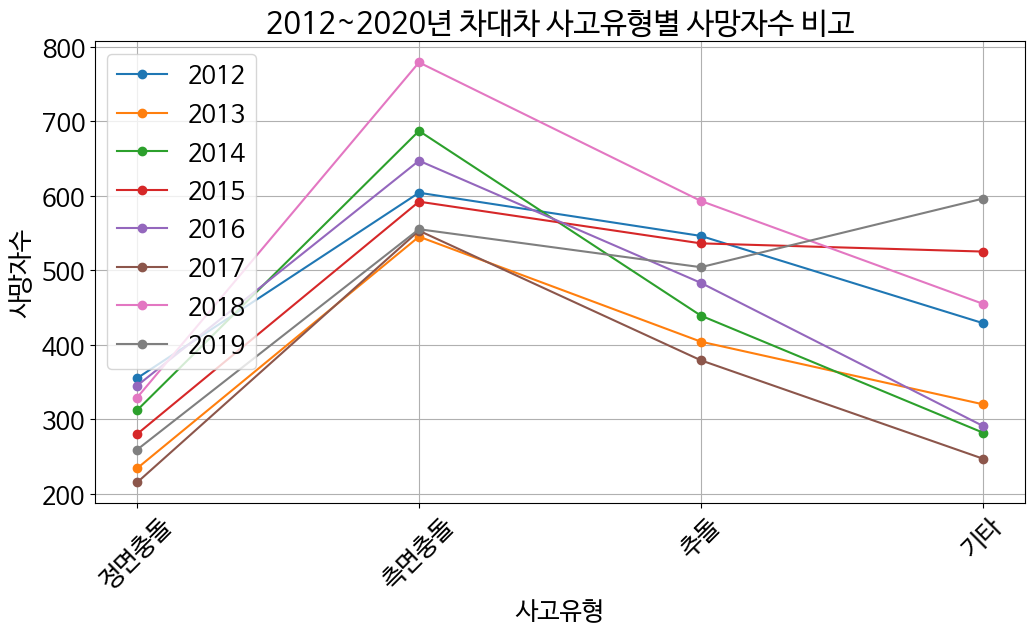

In [ ]:
import pandas as pd
import glob

# CSV 파일 경로 설정
csv_dir = '/content/drive/MyDrive/교통사고유형/'

# 파일 패턴 설정
file_pattern = '사고20*.csv'  # 2012부터 2020까지 파일에 매칭됨

# 빈 데이터프레임 리스트 생성
dataframes = []
ydf  = [2012,2013,2014,2015,2016,2017,2018,2019,2020]
# 파일 패턴과 일치하는 CSV 파일 목록 가져오기
csv_files = glob.glob(f'{csv_dir}/{file_pattern}')

# 각 파일을 순회하면서 데이터프레임 생성 및 리스트에 추가
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding='cp949')
    dataframes.append(df)

# 각 연도별 데이터프레임이 dataframes 리스트에 저장됨
# dataframes[0]은 2012년 데이터, dataframes[1]은 2013년 데이터, ..., dataframes[8]는 2020년 데이터
#print(df2012[(df2012['사고유형_대분류'] ==  '차대사람')])
plt.figure(figsize=(12,6))
for i in range(0,8,1):
  adf = (dataframes[i][(dataframes[i]['사고유형_대분류'] == '차대사람')])
  plt.plot(adf['사고유형_중분류'],adf['사망자수'],marker='o',label=ydf[i],linestyle='-')

plt.xlabel('사고유형')
plt.ylabel('사망자수')
plt.title('2012~2020년 차대사람 사고유형별 사망자수 비고')
plt.xticks(rotation=45)
plt.legend()

# 차트 표시
plt.grid(True)  # 그리드 추가
plt.show()



plt.figure(figsize=(12,6))
for i in range(0,8,1):
  adf = (dataframes[i][(dataframes[i]['사고유형_대분류'] == '차대차') & (dataframes[i]['사고유형_중분류'] != '후진중충돌')])
  plt.plot(adf['사고유형_중분류'],adf['사망자수'],marker='o',label=ydf[i],linestyle='-')

plt.xlabel('사고유형')
plt.ylabel('사망자수')
plt.title('2012~2020년 차대차 사고유형별 사망자수 비고')
plt.xticks(rotation=45)
plt.legend()

# 차트 표시
plt.grid(True)  # 그리드 추가
plt.show()

경찰청 시간대별 사고건수


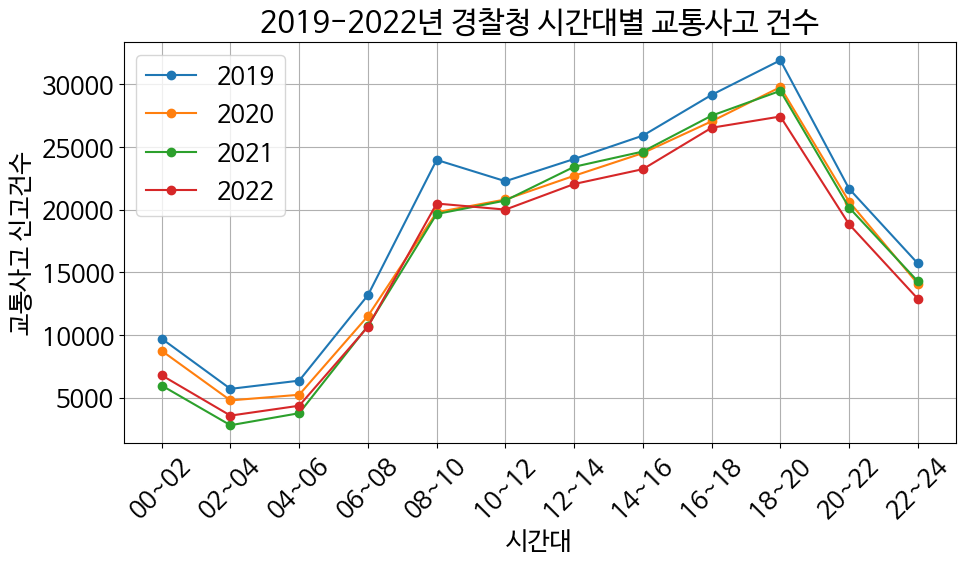

In [ ]:
import matplotlib.pyplot as plt

hdf = pd.read_csv('/content/drive/MyDrive/시간별 교통사고/경찰청_시간대별 교통사고 건수.csv')

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(hdf['시간대'], hdf['2019'], marker='o', label='2019')
plt.plot(hdf['시간대'], hdf['2020'], marker='o', label='2020')
plt.plot(hdf['시간대'], hdf['2021'], marker='o', label='2021')
plt.plot(hdf['시간대'], hdf['2022'], marker='o', label='2022')

plt.xlabel('시간대')
plt.ylabel('교통사고 신고건수')
plt.title('2019-2022년 경찰청 시간대별 교통사고 건수')
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()
plt.grid(True)

plt.tight_layout()

# 그래프 표시
plt.show()


2021년도 시간대별 교통사고

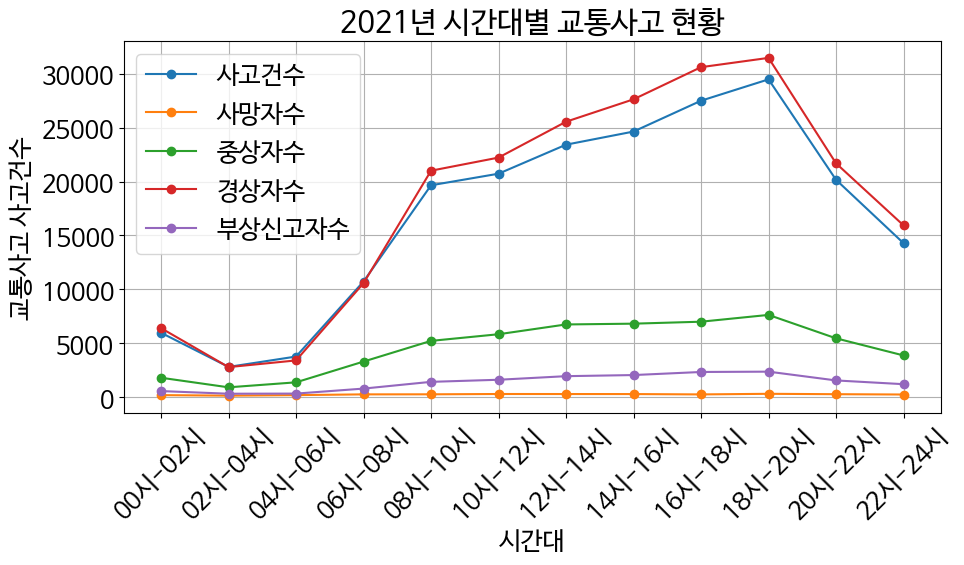

In [ ]:
import matplotlib.pyplot as plt

tdf2021 = pd.read_csv('/content/drive/MyDrive/시간별 교통사고/도로교통공단_시간대별 교통사고(2021).csv',encoding='CP949')

plt.figure(figsize=(10, 6))

plt.plot(tdf2021['시간대'],tdf2021['사고건수'], marker='o', label='사고건수')
plt.plot(tdf2021['시간대'],tdf2021['사망자수'], marker='o', label='사망자수')
plt.plot(tdf2021['시간대'],tdf2021['중상자수'], marker='o', label='중상자수')
plt.plot(tdf2021['시간대'],tdf2021['경상자수'], marker='o', label='경상자수')
plt.plot(tdf2021['시간대'],tdf2021['부상신고자수'], marker='o', label='부상신고자수')

plt.xlabel('시간대')
plt.ylabel('교통사고 사고건수')
plt.title('2021년 시간대별 교통사고 현황')
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()
plt.grid(True)

plt.tight_layout()

# 그래프 표시
plt.show()
